# Two stream numerical code and tests

In [39]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
tau,omega,xi,omegaSoil = 5.,0.5,0.0,0.0
nsd=5
theta=45
dtau=0.01
correct=False
plot=False
diffuse=True

In [40]:
# how many layers in canopy: nz_canopy
nz_canopy = int(np.ceil(tau/(dtau)))
dt = 1./float(nz_canopy)
# need to know filter width   : nz_filter
# value of tau for the filter : tauFilt

tauFilt = np.arange(-nsd,nsd,dt)
nz_filter = len(tauFilt)

# need to know total extent to store: nz
nz = int(nz_canopy+2*nz_filter)
nz = 2*int(nz/2) 

# create canopy array of zeros : canopyI0
tauCanopy = np.arange(nz)*dt - nz_filter*dt
canopyI0 = np.zeros_like(tauCanopy)
# source term: put unity at top of 
# canopy: index nz_filter-1
canopyI0[tauCanopy==0] = 1.0


canopyExtent = np.logical_and(tauCanopy>0,tauCanopy<=tau)
print(canopyExtent.sum()*dt)

5.0


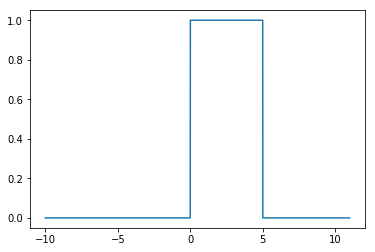

In [34]:
plt.plot(tauCanopy,canopyExtent)

In [42]:
'''
Calculate Int(exp(-(t / mu) mu,dmu)/Int(exp(-(t / mu) mu,dmu)

scipy.special.expi
integral(exp(t)/t,t=-inf..x)

'''

n = 10001
dmu = 1./(n-1)
mu = np.arange(n)*dmu
mask = mu==0

m = np.zeros_like(mu)
m[~mask] = 1./mu[~mask]
m[mask] = 1e200

dtau = 10./(n-1)
tau = np.arange(n)*dtau

ee = []
for t in tau:
    ee.append((np.exp(-t *m) * mu * dmu).sum()/(  np.atleast_1d(mu * dmu)).sum())
    


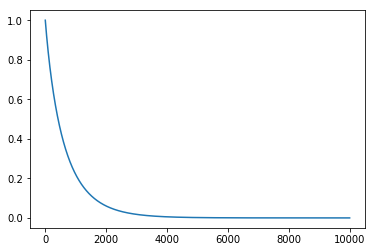

In [38]:
plt.plot(ee)